# Imports

<i>Melakukan import modul pandas, numpy dan juga matplotlib. Chained assignment pada pandas dinon-aktifkan dan format secara global untuk angka diubah menjadi :,.2f</i>

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# disabling warning copying a slice from a dataframe
pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.float_format = '{:,.2f}'.format

# Membaca data

<i>Data yang digunakan dalam analisa ini adalah data penjualan PT Panatrade Caraka selama tahun berjalan 2022 (cut off bulan Maret 2022).</i>

In [118]:
data = pd.read_csv('Sales2022.csv')

# Memilih dan Membersihkan Data

In [165]:
# Selecting specific data
data_terpilih = data[['Art', 'Quantity', 'Bruto', 'Net', 'Cogs', 'Profit', 'brand', 'customer', 'date']]

# Cleaning data and converting string to float for some columns
data_terpilih['Quantity'] = data_terpilih['Quantity'].str.replace(',','').astype(float)
data_terpilih['Bruto'] = data_terpilih['Bruto'].str.replace(',','').astype(float)
data_terpilih['Net'] = data_terpilih['Net'].str.replace(',','').astype(float)
data_terpilih['Cogs'] = data_terpilih['Cogs'].str.replace(',','').astype(float)
data_terpilih['Profit'] = data_terpilih['Profit'].str.replace(',','').astype(float)

## I. Perhitungan Diskon

$
\begin{align}
disc = \frac{bruto - net}{bruto}
\end{align}
$

In [166]:
data_terpilih['discount'] = (data_terpilih['Bruto'] - data_terpilih['Net']) / data_terpilih['Bruto']

In [167]:
# selected_data basic information
data_terpilih.describe()

,Quantity,Bruto,Net,Cogs,Profit,discount
count,"56,293.00","56,293.00","56,293.00","56,293.00","56,293.00","56,255.00"
mean,8.25,"2,837,451.46","1,801,463.84","1,193,161.90","608,301.94",0.34
std,29.40,"5,689,682.46","3,408,645.28","2,277,587.64","1,222,853.10",0.07
min,0.00,0.00,0.00,"-535,306.27","-3,720,384.81",0.15
25%,2.00,"799,200.00","503,712.00","330,683.20","149,707.16",0.33
50%,3.00,"1,398,000.00","863,898.00","593,406.18","301,328.00",0.33
75%,6.00,"2,878,800.00","1,841,830.00","1,233,212.82","628,299.90",0.33
max,"1,527.00","227,880,000.00","148,122,000.00","82,152,999.05","68,820,588.05",0.80


### I.1 Pengelompokkan dan Penjumlahan Net Sales Berdasarkan Tingkat Diskon

In [168]:
net_berdasar_disc = data_terpilih[['discount', 'Net']].groupby(['discount']).sum()

#### I.1.a Informasi Net Sales Berdasar Pengelompokkan Tingkat Diskon

In [169]:
net_berdasar_disc.describe()

,Net
count,38.00
mean,"2,668,679,049.64"
std,"9,830,334,723.57"
min,"2,189,527.20"
25%,"39,478,654.21"
50%,"250,932,795.00"
75%,"591,247,470.50"
max,"60,029,116,990.00"


### I.2 Pengelompokkan dan Penjumlahan Net Sales Berdasarkan Customer

In [170]:
net_berdasar_cust = data_terpilih[['customer', 'Net']].groupby(['customer']).sum()

#### I.2.aTotal Nilai Net Sales

In [171]:
net_berdasar_cust.sum()

Net   101,409,803,886.38
dtype: float64

#### 1.2.b Informasi Net Sales Berdasar Pengelompokkan Customer

In [172]:
net_berdasar_cust.describe()

,Net
count,191.00
mean,"530,941,381.60"
std,"1,100,844,978.09"
min,"2,061,306.00"
25%,"45,325,165.00"
50%,"151,818,052.00"
75%,"543,501,646.00"
max,"7,922,778,430.00"


<i>Berikut adalah kontribusi net sales YTD 2022 untuk customer dengan total nilai net sales di atas nilai rata - rata net sales dari semua customer (kecuali PT Prestasi Retail Innovation)</i>

In [183]:
# slicing customer by customer with net sales above the average net sales
cust_diatas_rerata = net_berdasar_cust.loc[(net_berdasar_cust['Net'] > net_berdasar_cust['Net'].mean()) & 
                                           (net_berdasar_cust.index != "PRESTASI RETAIL INNOVATION PT")].sort_values(by=['Net'], ascending=False)
cust_diatas_rerata

,Net
customer,
ARIF SPORT SOLO CV,"7,269,582,657.38"
ARIMBI ADIPUTRA CV - SURABAYA,"7,005,881,008.00"
INTI KWAN LEE PT,"4,347,616,340.00"
GLOBAL RETAILINDO DIGITAL PT,"3,334,030,870.00"
LIBERTY STORE CV - JAMBI,"3,331,326,658.00"
GLOBAL MITRA SPORTINDO PT,"3,284,242,990.00"
"CEMERLANG, KENDAL","3,225,719,180.00"
SETH SPORTS ( CASH ),"2,629,404,226.00"
MENCETAK BANYAK GOL PT. ( GBD 60 ),"1,861,490,206.00"


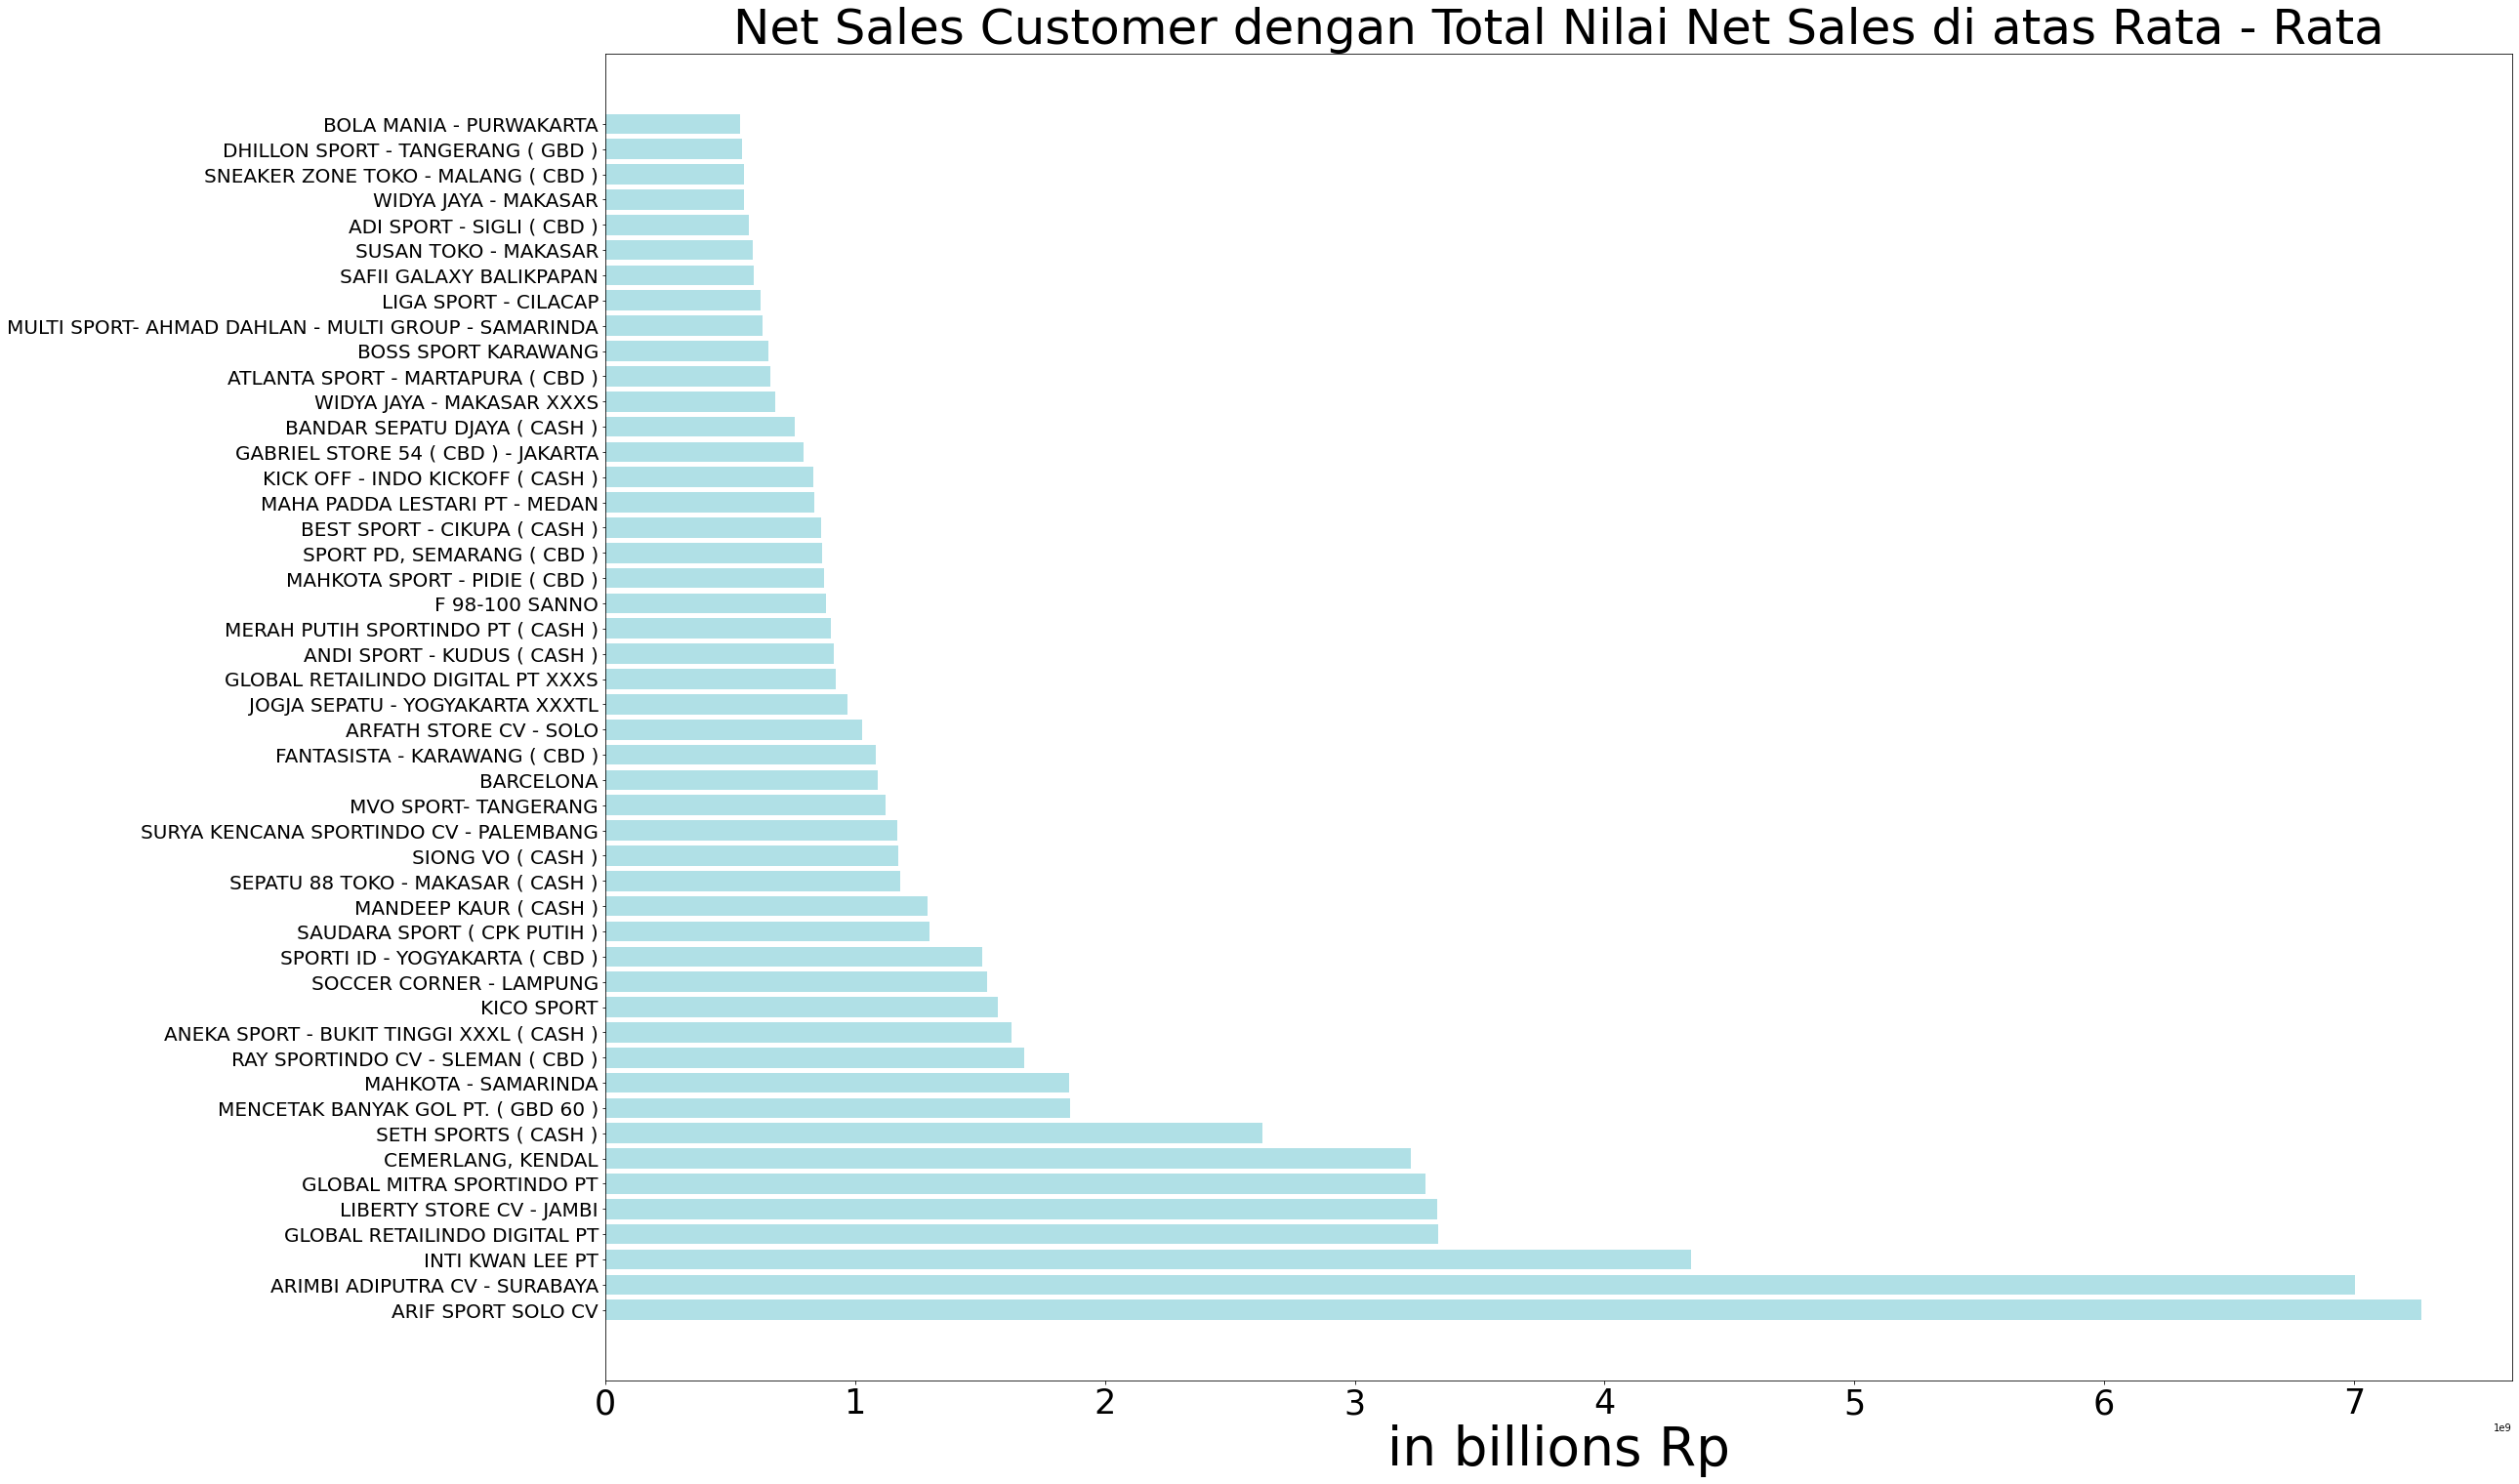

In [184]:
plt.figure(figsize=(35,25))
plt.barh(cust_diatas_rerata.index, cust_diatas_rerata['Net'], color='powderblue')
plt.xlabel("in billions Rp", fontsize=55)
plt.title("Net Sales Customer dengan Total Nilai Net Sales di atas Rata - Rata", fontsize=50)
plt.yticks(fontsize=20)
plt.xticks(fontsize=35)
plt.show()